# **Google playstore Data**
**Complete Exploratory Data Analysis**

## About Dataset

>- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

- `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## 1. Importing Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

#2. **Data Loading, Exploration, and Cleansing**

 ↪ Load the CSV file into a Pandas DataFrame

 ↪ Investigate and comprehend the data within the dataset using Pandas

 ↪ Address the following data quality concerns:
 
- Handle missing data
- Identify and manage outliers
- Rectify any incorrect or invalid records


In [70]:
df = pd.read_csv('googleplaystore.csv')

- Lets have a look on fist 5 some columns and rows 

In [71]:
df.head(5)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

> ***Note*** In order to show the complete output of the rows and columns. We used these commands

In [72]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)

- Lets have a look on the names of the columns in the dataset

In [73]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

- Lets check out datatypes, no of columns, rows

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **Observations**

- No of Columns = 13
- No of Rows    = 10841
- Here we have seen that some of our columns have object datatypes but they should be numeric. We can convert them into numeric later on.
- - `'Size', 'Installs', 'Price'`

> ***Note*** *So by using the describe function we can easily get the a concise summary of the numerical columns in the DataFrame, giving you valuable insights into the data*.

In [75]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

# Some insights using Describe function
1. ***Count***: The number of non-null values for each column.
2. ***Mean***: The arithmetic mean (average) of the values in each column.
3. ***Standard Deviation***: The standard deviation of the values in each column, which measures the spread or dispersion of the data.
4. ***Minimum***: The minimum value in each column.
5. ***25%***: The value at the 25th percentile (the first quartile) for each column.
6. ***50%***: The median value (the 50th percentile) for each column.
7. ***25%***: The value at the 75th percentile (the third quartile) for each column.
8. ***Maximum***: The maximum value in each column.

- Let take care of `Size` column first

- Null values

In [76]:
df['Size'].isnull().sum()

np.int64(0)

- NO null values we are good to go 

In [77]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

- Here the unique values some of the values are in unit `K` and some are in `M` So we have to convert these values into one unit and the purpose for doing this is after converting to one unit we can cahnge the datatype into numeric

In [78]:
# find the values in size column which has 'M' in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8829)

In [79]:
# find the values in size column which has 'k' in it
# find the values in size column which has 'k' in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()


np.int64(316)

In [80]:
# find the values in size column which has 'Varies with device' in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [81]:
# taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it
8830+316+1695

10841

`Summary`
- We have `8830` values in `M` units
- We have `316` values in `k` units
- We have `1695` value in `Varies with device` 

> Let's convert the `M` and `K` units into bytes and then remove the `M` and `K` from the values and convert them into numeric data type.

- We can convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it

In [82]:
  def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size)

In [83]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [84]:
# making a new column called 'Size in Mb' which will have the size in MB
#df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

  - Here we have converted the all values in bytes and convert them into numjeric data type also we have removed `K` and `M` `except varies with device` which we consider as `null values` and we will see them later on and 

- Lets have a check on `Installs` column

In [85]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [86]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [87]:
# Lets count the no of values that have "+" sign
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

np.int64(10839)

In [88]:
df['Installs'].isnull().sum()

np.int64(0)

`No null Values we are good to go`

- We have two things to fix
  1. First is the `+` and `,` sign 
  2. Second is we have to convert the data type of `Installs` into numeric

In [89]:
# remove the plus sign from install column and convert it to numeric
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
# also remove the commas from the install column
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)


In [90]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('Free', '1') if 'Free' in str(x) else x)


In [91]:
df['Installs'] = df['Installs'].apply(lambda x: int(x))

- Finally we convert the `Installs` column into numeric datatype

In [92]:
# Lets have a check on it 
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews Size_in_bytes  Installs  Type Price Content Rating  \
0     159    19922944.0     10000  Free     0       Everyone   
1     967    14680064.0    500000  Free     0       Everyone   
2   87510     9122611.2   5000000  Free     0       Everyone   
3  215644    26214400.0  50000000  Free     0           Teen   
4     967     2936012.8    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

- Successfully Done

- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [93]:
df['Installs'].max() # this will show the value counts of the column

np.int64(1000000000)

- Let's create a new column named as the "Installs_category" which will contain the bins of the installs column.

In [94]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['very_low', 'low', 'medium', 'medium_high', 'high', 'very_high', 'extremely_high', 'top_notch']
df['Installs_category'] = pd.cut((df['Installs']) ,  bins= bins , labels= labels , )

- So lets look on the `Installs_category` column

In [95]:
df['Installs_category'].value_counts()

Installs_category
medium            2161
very_high         2118
extremely_high    2004
high              1648
medium_high       1531
top_notch          828
low                536
very_low            15
Name: count, dtype: int64

- Now its time to look the `Price` column

In [96]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [97]:
df['Price'].isnull().sum()

np.int64(0)

- No `null values` good to go

- We will check how many values in the `Price` column have the `$` sign in it.

In [98]:
df['Price'].loc[df['Price'].str.contains("\$")].value_counts().sum()

np.int64(800)

In [99]:
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

np.int64(10040)

- Here we have to remove the `&` sign from `Price column`

In [100]:
# THe written below expression will remove all the "$" signs from the column. 

df['Price'] = df['Price'].apply(lambda x : x.replace("$" , "") if "$" in str(x) else x)



In [101]:
df['Price'] = df['Price'].apply(lambda x : x.replace("Everyone" , "1.26") if "Everyone" in str(x) else x)



In [102]:
# THe written below expression will convert the datatype of the column into float

df['Price'] = df['Price'].apply(lambda x : float(x))

- Now lets check the datatype whether it is converted or not

In [103]:
df['Price'].dtype

dtype('float64')

### It's time to check the descriptive status of the numeric columns.

In [104]:
df.describe()

Rating      Installs         Price
count  9367.000000  1.084100e+04  10841.000000
mean      4.193338  1.546291e+07      1.027390
std       0.537431  8.502557e+07     15.948968
min       1.000000  0.000000e+00      0.000000
25%       4.000000  1.000000e+03      0.000000
50%       4.300000  1.000000e+05      0.000000
75%       4.500000  5.000000e+06      0.000000
max      19.000000  1.000000e+09    400.000000

## **Observations**
---
- Now we have 6 columns of the numeric datatype.
- In the `Rating` column the maximum value is `5.0` and minimum is `1.0` also the mean value is `4.19`. Also " 4.19 " is a good rating.
- We can see that the `Reviews` column has a minimum value of `0` and a maximum value of `78,158,306` 78+ Millions, which is the range of reviews, and the mean is `444,111.93` which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

- Therefore, it is important to classify apps based on the correlation matrix and observe the descriptive status of the App's category, number of installs, rating and reviews etc.

But before that we have to cope up with the missing values.

## **2.2. Dealing with the Missing Values**
- Dealing with the missing values is the most important part of the data wrangling process, In order to get the correct insights of the data, missing valeus must be addressed.

In [105]:
df.isnull().sum()

App                     0
Category                0
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          1
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             3
Installs_category       0
dtype: int64

- Let's get the total number of the null values in the dataFrame 

In [106]:
print(f"The total number of null values in the dataFrame are : {df.isnull().sum().sum()}")

The total number of null values in the dataFrame are : 3182


- Now check the missing values in percentage form

In [107]:
((df.isnull().sum() / len(df) * 100) ).sort_values(ascending = False)

Size_in_bytes        15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.027673
Content Rating        0.009224
Type                  0.009224
Installs              0.000000
Reviews               0.000000
App                   0.000000
Category              0.000000
Genres                0.000000
Price                 0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

- **Lets visualize the missing values using different graph plots** 

1. `Heatmap`

<Axes: >

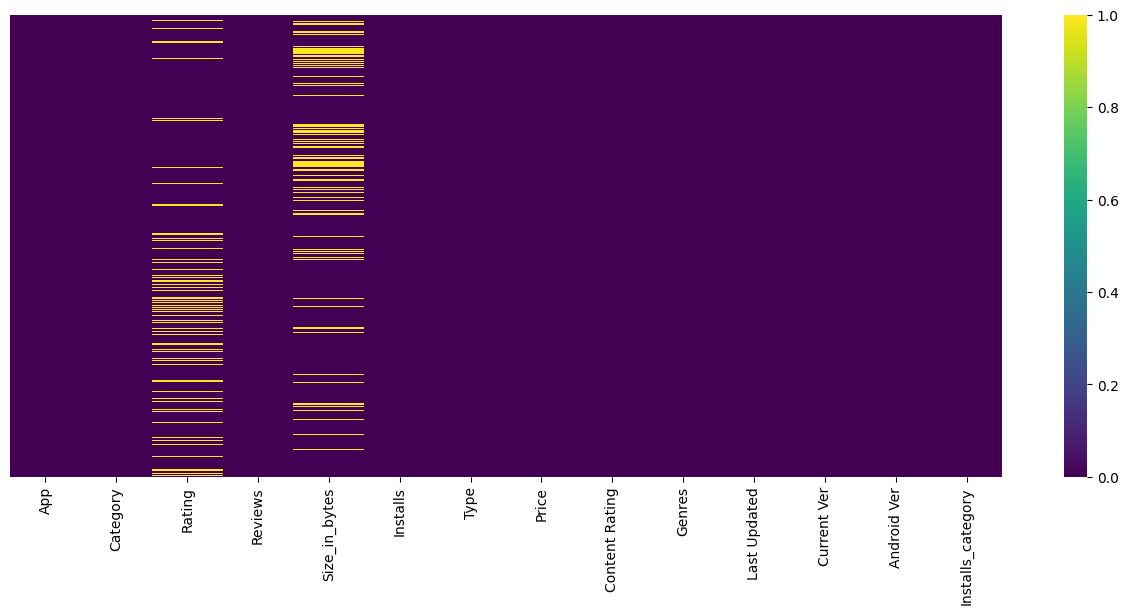

In [108]:
plt.figure(figsize = (16,6))

# THis expression will plot the missing values in the dataset using the heatmap.

sns.heatmap(data = df.isnull() , yticklabels = False , cbar = True , cmap = 'viridis' )


2. `Bar Plot`

Text(0.5, 1.0, 'Percentageof NULL values in dataFrame.')

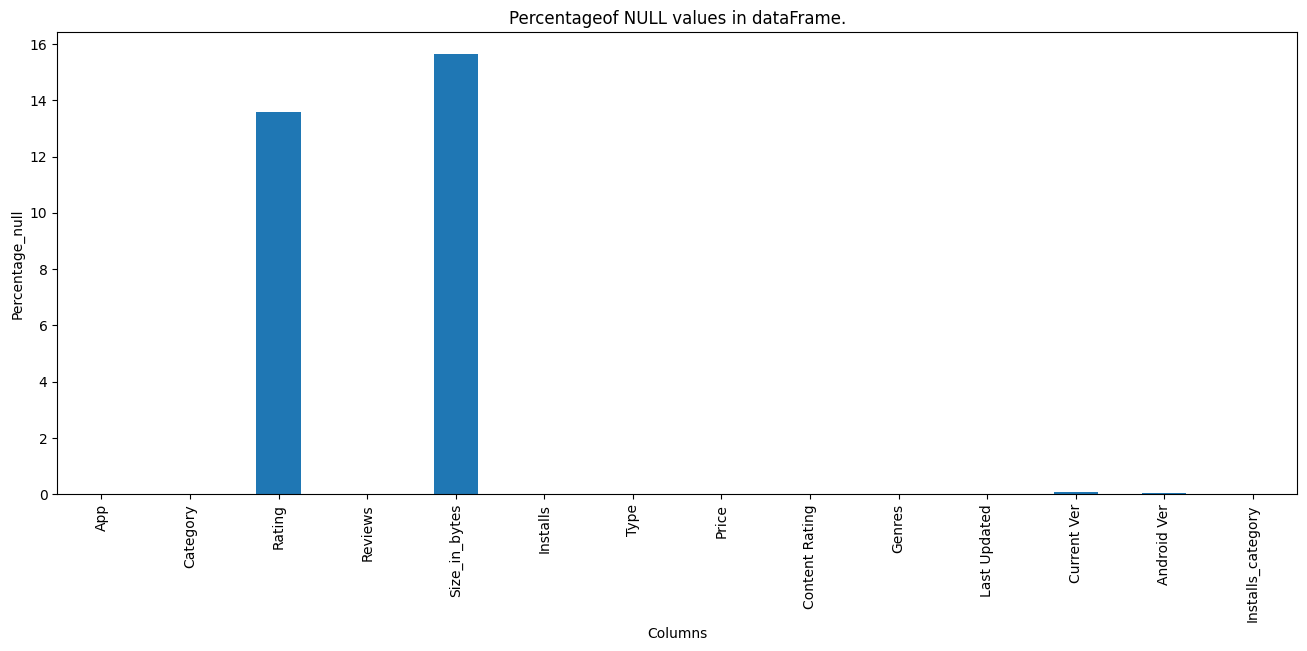

In [109]:
# make the figure size.
plt.figure(figsize = (16 , 6))

# Let's count the percentage of null values in the dataFrame.

percentage_null = df.isnull().sum() / len(df) * 100
percentage_null.plot(kind = 'bar')

# NOw we have to add the labels.

plt.xlabel("Columns")
plt.ylabel("Percentage_null")
plt.title("Percentageof NULL values in dataFrame.")

## **Observations**
---

- In the `Size_in_bytes` and the `Size_in_Mbs` columns ahve the `1695` missing values which makes upto the percentage of `15.63`.
- THe `Rating` column has the `1474` missing values which makes upto the `13.59` percent of the missing values.
- `Current ver` and the `Android ver` has the `8` and `2` missing values and their percentage is `0.07` `0.018` respectively.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

 ### **2.3. Dealing with the missing values**
- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---

- Let's run the correlations

In [110]:
df.describe() # THis will tell us about the numberic columns in the dataFrame.

Rating      Installs         Price
count  9367.000000  1.084100e+04  10841.000000
mean      4.193338  1.546291e+07      1.027390
std       0.537431  8.502557e+07     15.948968
min       1.000000  0.000000e+00      0.000000
25%       4.000000  1.000000e+03      0.000000
50%       4.300000  1.000000e+05      0.000000
75%       4.500000  5.000000e+06      0.000000
max      19.000000  1.000000e+09    400.000000

## **Observations**
- Only `Rating` and `Size_in_bytes` or `Size_in_Mb` columns are left with missing values.
  - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
  - In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.

In [111]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Installs_category'],
      dtype='object')

- Let's look at the `Installs_category` with respect to the `Rating`.

In [112]:
df.groupby("Installs_category")["Rating"].describe()

count      mean       std  min  25%  50%  75%   max
Installs_category                                                      
very_low              0.0       NaN       NaN  NaN  NaN  NaN  NaN   NaN
low                  82.0  4.812195  1.794807  1.0  4.8  5.0  5.0  19.0
medium             1279.0  4.171149  0.825307  1.0  3.8  4.4  4.8   5.0
medium_high        1442.0  4.035160  0.604533  1.4  3.8  4.2  4.5   5.0
high               1617.0  4.093197  0.505468  1.6  3.9  4.2  4.5   4.9
very_high          2115.0  4.207470  0.376423  1.8  4.0  4.3  4.5   4.9
extremely_high     2004.0  4.287076  0.294902  2.0  4.1  4.3  4.5   4.9
top_notch           828.0  4.374396  0.193726  3.1  4.3  4.4  4.5   4.8

- **Its time to handle the `Missing Values` in the `Installs Category`**

In [113]:
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
medium            882
low               454
medium_high        89
high               31
very_low           15
very_high           3
extremely_high      0
top_notch           0
Name: count, dtype: int64

- LEt's fill the `Rating` values with their respective mean values in the `Installs_category`.

In [114]:
# this will give the average rating for each installs category
ave_installs_cat = df.groupby("Installs_category")["Rating"].transform('mean') 

# this will fill the null values in the 'Rating' column with the average rating for each installs category
df['Rating'] = df['Rating'].fillna(ave_installs_cat) 

- LEt's check the missing values again.

In [115]:
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
very_low          15
low                0
medium             0
medium_high        0
high               0
very_high          0
extremely_high     0
top_notch          0
Name: count, dtype: int64

- There are still some missing values in the very_low bin, as it has the range from `-2 , 0` we will impute it with zero.

In [116]:
df['Rating'] = df['Rating'].fillna(0)

In [117]:
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
very_low          0
low               0
medium            0
medium_high       0
high              0
very_high         0
extremely_high    0
top_notch         0
Name: count, dtype: int64

In [118]:
df['Installs_category'].isnull().sum()

np.int64(0)

- `Finally we have done with missing values`

In [119]:
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
very_low          0
low               0
medium            0
medium_high       0
high              0
very_high         0
extremely_high    0
top_notch         0
Name: count, dtype: int64

- There aren't any null values in the `Reviews` column.

<Axes: xlabel='Installs_category', ylabel='Reviews'>

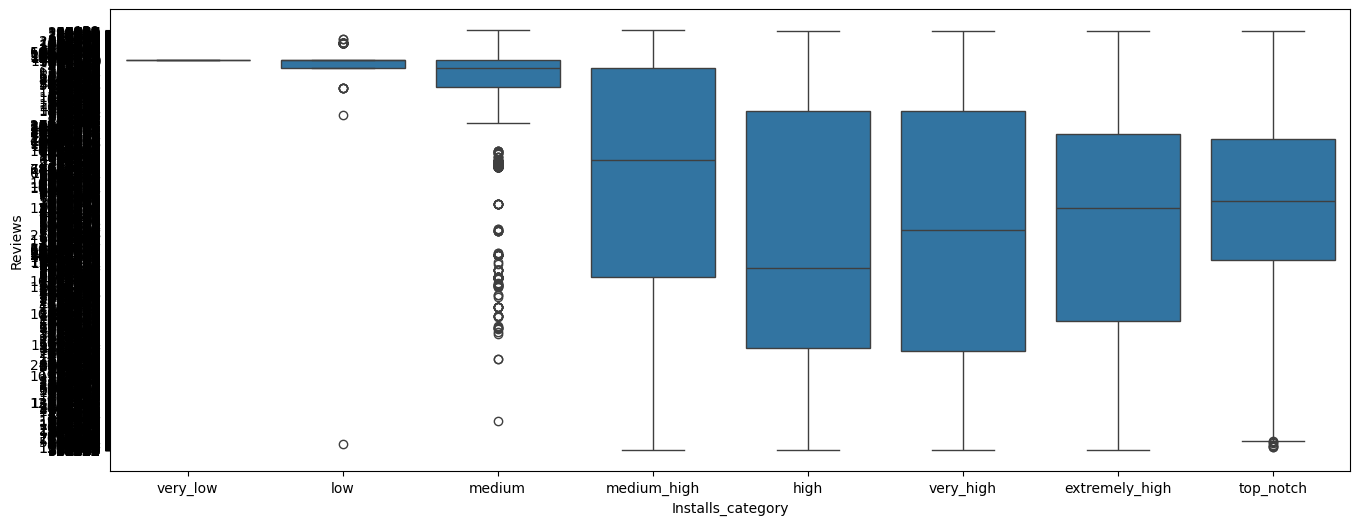

In [120]:
plt.figure(figsize= (16 , 6))
sns.boxplot(data= df , x = "Installs_category" , y = "Reviews")

- We can also draw the Scatter plot among the `Rating` , `Reviews` and the `Installs_category` column.

<Axes: xlabel='Rating', ylabel='Reviews'>

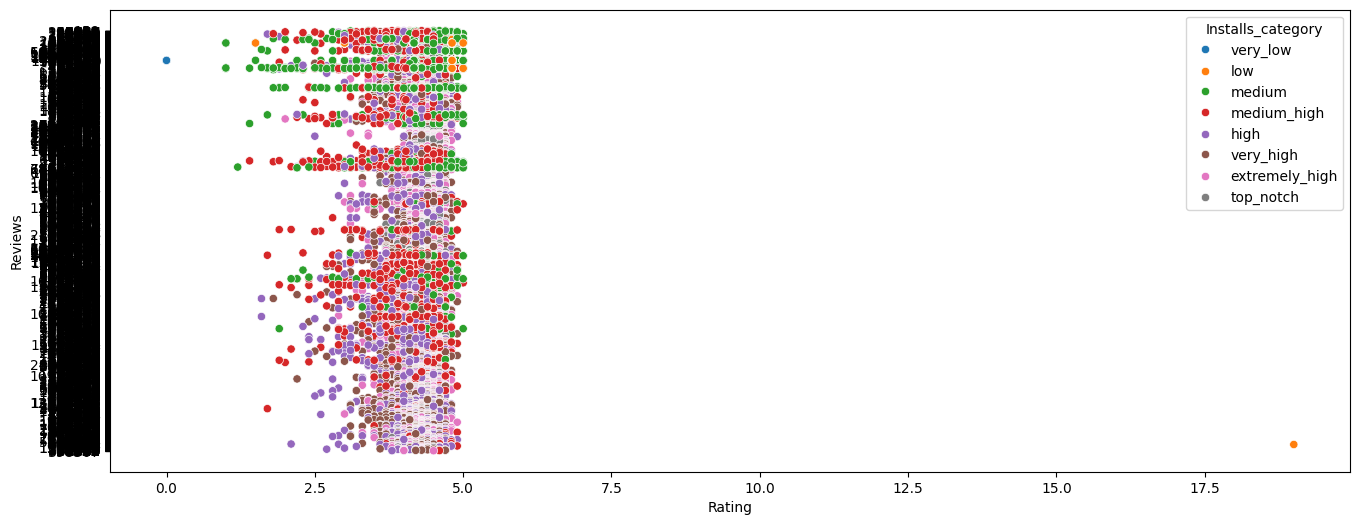

In [121]:
plt.figure(figsize= (16 , 6))

sns.scatterplot(data = df , x = "Rating" , y = "Reviews" , hue = "Installs_category")

- It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

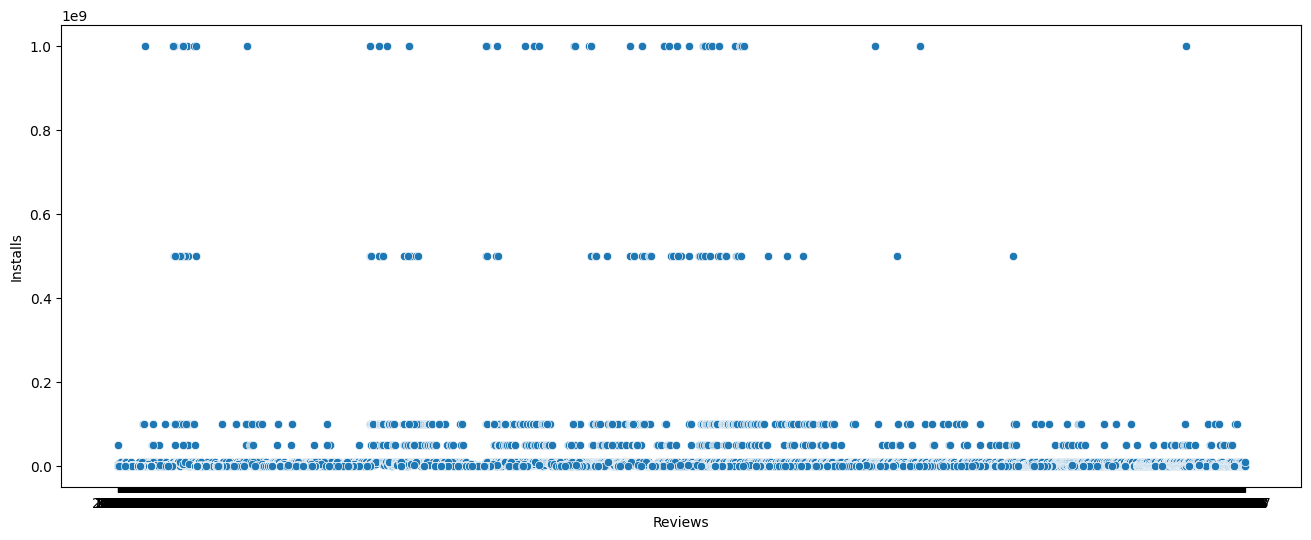

In [122]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

---
## **Observation**
-We can see that most of the null values from `Rating` column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

## 2.3. **Duplicates**

1. Removing duplicates is crucial during data wrangling to ensure accurate insights from the dataset.
2. Failure to remove duplicates can distort analysis and lead to misleading conclusions.
3. Duplicates can skew statistical measures such as mean, median, and standard deviation, potentially biasing results by over-representing certain data points.
4. Ensuring data accuracy through duplicate removal is essential for reliable data analysis.

In [123]:
df.duplicated().sum()

np.int64(483)

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.


In [124]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

np.int64(1181)

- Oops! we have 1181 dupicate app names

let's check for number of duplicates in each column using a for loop and printing the output

In [125]:
for col in df.columns:
    print(f"THe duplicated number of apps in the {col} are : {df['App'].duplicated().sum()} ")

THe duplicated number of apps in the App are : 1181 
THe duplicated number of apps in the Category are : 1181 
THe duplicated number of apps in the Rating are : 1181 
THe duplicated number of apps in the Reviews are : 1181 
THe duplicated number of apps in the Size_in_bytes are : 1181 
THe duplicated number of apps in the Installs are : 1181 
THe duplicated number of apps in the Type are : 1181 
THe duplicated number of apps in the Price are : 1181 
THe duplicated number of apps in the Content Rating are : 1181 
THe duplicated number of apps in the Genres are : 1181 
THe duplicated number of apps in the Last Updated are : 1181 
THe duplicated number of apps in the Current Ver are : 1181 
THe duplicated number of apps in the Android Ver are : 1181 
THe duplicated number of apps in the Installs_category are : 1181 


- The duplicate values columns with numeric  or float data type can be filled using the mean method

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10841 non-null  object  
 1   Category           10841 non-null  object  
 2   Rating             10841 non-null  float64 
 3   Reviews            10841 non-null  object  
 4   Size_in_bytes      9146 non-null   object  
 5   Installs           10841 non-null  int64   
 6   Type               10840 non-null  object  
 7   Price              10841 non-null  float64 
 8   Content Rating     10840 non-null  object  
 9   Genres             10841 non-null  object  
 10  Last Updated       10841 non-null  object  
 11  Current Ver        10833 non-null  object  
 12  Android Ver        10838 non-null  object  
 13  Installs_category  10841 non-null  category
dtypes: category(1), float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [127]:
unique_values = df['Price'].unique()
mean_value = df['Price'].loc[~df['Price'].duplicated()].mean()
df['Price'] = df['Price'].where(~df['Price'].duplicated(), mean_value)
print("\nUpdated DataFrame:")
print(df)


Updated DataFrame:
                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
6                Smoke Effect Photo Maker - Smoke Editor       ART_AND_DESIGN   
7                                       Infinite Painter       ART_AND_DESIGN   
8                                   Garden Coloring Book       ART_AND_DESIGN   
9                          Kids Paint Free - Drawing Fun       ART_AND_DESIGN   
10                               Text on Photo - Fonteee       ART_AND_DESIGN   
11      